# HW-8 - Deep Learning

In this homework, we'll build a model for predicting if we have an image of a bee or a wasp. For this, we will use the "Bee or Wasp?" dataset that was obtained from Kaggle and slightly rebuilt.

You can download the dataset for this homework from here:

https://github.com/SVizor42/ML_Zoomcamp/releases/download/bee-wasp-data/data.zip

## 1. Import the libraries

In [ ]:
pip install scipy

In [2]:
import os
import shutil
import scipy

import tensorflow
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras

from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

2023-11-20 20:39:19.933004: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [3]:
# Tensorflow version
tensorflow.__version__

'2.9.1'

## 2. Data preparation

In [4]:
import urllib.request
url = 'https://github.com/SVizor42/ML_Zoomcamp/releases/download/bee-wasp-data/data.zip'
filename = 'data.zip'
urllib.request.urlretrieve(url, filename)

('data.zip', <http.client.HTTPMessage at 0x7fd11f4bf4c0>)

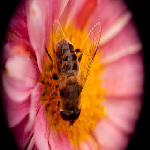

In [5]:
# Cheching the path for the train and test folders
img = image.load_img("data/test/bee/10007154554_026417cfd0_n.jpg", target_size=(150, 150))
img

In [6]:
# Create the train and test folders path
train_dir = 'data/train'
test_dir = 'data//test'

## 3. Model

For this homework we will use Convolutional Neural Network (CNN). Like in the lectures, we'll use Keras.

You need to develop the model with following structure:

- The shape for input should be `(150, 150, 3)`
- Next, create a convolutional layer (Conv2D):
    - Use 32 filters
    - Kernel size should be `(3, 3)` (that's the size of the filter)
    - Use `'relu'` as activation
- Reduce the size of the feature map with max pooling (`MaxPooling2D`)
    - Set the pooling size to `(2, 2)`
- Turn the multi-dimensional result into vectors using a Flatten layer
- Next, add a `Dense` layer with 64 neurons and `'relu'` activation
- Finally, create the `Dense` layer with 1 neuron - this will be the output
    - The output layer should have an activation - use the appropriate activation for the binary classification case

In [7]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

2023-11-20 20:39:30.202653: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-20 20:39:30.209227: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-20 20:39:30.209458: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-20 20:39:30.210250: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the approp

As optimizer use `SGD` with the following parameters:

- `SGD(lr=0.002, momentum=0.8)`

In [8]:
model.compile(loss='binary_crossentropy',\
             optimizer=optimizers.SGD(learning_rate=0.002, momentum=0.8),\
             metrics=['acc'])

## Question 1

Since we have a binary classification problem, what is the best loss function for us?

- `mean squared error`
- <u>**`binary crossentropy`**</u>
- `categorical crossentropy`
- `cosine similarity`

## Question 2

What's the number of parameters in the convolutional layer of our model? You can use the summary method for that.

- `1`
- `65`
- `896`
- <u>**`11214912`**</u>

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 175232)            0         
                                                                 
 dense (Dense)               (None, 64)                11214912  
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 11,215,873
Trainable params: 11,215,873
Non-trainable params: 0
____________________________________________

## Generators  and Training

For the next two questions, use the following data generator for both train and test sets:

`ImageDataGenerator(rescale=1./255)`

In [10]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

- We don't need to do any additional pre-processing for the images.
- When reading the data from train/test directories, check the `class_mode` parameter. Which value should it be for a binary classification problem?
- Use `batch_size=20`
- Use `shuffle=True` for both training and test sets.

In [11]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    shuffle=True)

Found 3677 images belonging to 2 classes.


In [12]:
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(150, 150),
                                                  batch_size=20,
                                                  class_mode='binary',
                                                  shuffle=True)

Found 918 images belonging to 2 classes.


In [13]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


For training use `.fit()` with the following params:

```
model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator)
```  

In [14]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator)

Epoch 1/10


2023-11-20 20:39:46.320895: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2023-11-20 20:39:46.962048: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-20 20:39:46.962539: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-20 20:39:46.962574: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2023-11-20 20:39:46.963087: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-20 20:39:46.963161: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


184/184 [==============================] - 11s 50ms/step - loss: 0.6602 - acc: 0.5880 - val_loss: 0.5954 - val_acc: 0.6623
Epoch 2/10
184/184 [==============================] - 9s 49ms/step - loss: 0.5879 - acc: 0.6889 - val_loss: 0.5940 - val_acc: 0.6830
Epoch 3/10
184/184 [==============================] - 9s 49ms/step - loss: 0.5488 - acc: 0.7267 - val_loss: 0.5364 - val_acc: 0.7353
Epoch 4/10
184/184 [==============================] - 9s 48ms/step - loss: 0.5218 - acc: 0.7571 - val_loss: 0.5980 - val_acc: 0.6786
Epoch 5/10
184/184 [==============================] - 9s 49ms/step - loss: 0.4945 - acc: 0.7803 - val_loss: 0.5436 - val_acc: 0.7549
Epoch 6/10
184/184 [==============================] - 9s 49ms/step - loss: 0.4736 - acc: 0.7919 - val_loss: 0.5222 - val_acc: 0.7484
Epoch 7/10
184/184 [==============================] - 9s 49ms/step - loss: 0.4448 - acc: 0.8118 - val_loss: 0.4981 - val_acc: 0.7832
Epoch 8/10
184/184 [==============================] - 9s 49ms/step - loss: 0.42

## Question 3

What is the median of training accuracy for all the epochs for this model?

- `0.20`
- `0.40`
- `0.60`
- <u>**`0.80`**</u>

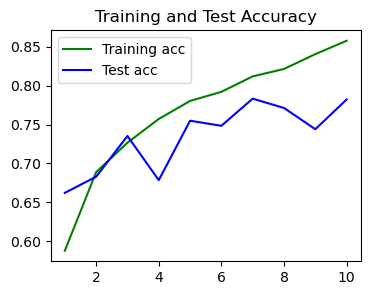

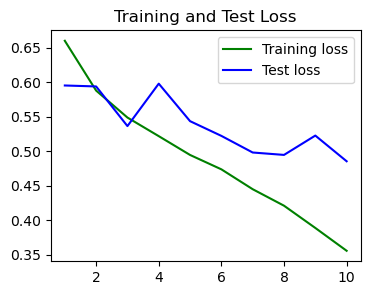

In [16]:
acc = history.history['acc']
test_acc = history.history['val_acc']
loss = history.history['loss']
test_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(4, 3))
plt.plot(epochs, acc, 'g', label='Training acc')
plt.plot(epochs, test_acc, 'b', label='Test acc')
plt.title('Training and Test Accuracy')
plt.legend()

plt.figure(figsize=(4, 3))
plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, test_loss, 'b', label='Test loss')
plt.title('Training and Test Loss')
plt.legend()

plt.show()

In [17]:
# Median of training accuracy
acc_median = np.median(acc)
acc_median

0.7861028015613556

- What is the median of training accuracy for all the epochs for this model?: **`0.80`**

## Question 4

What is the standard deviation of training loss for all the epochs for this model?

- `0.031`
- `0.061`
- <u>**`0.091`**</u>
- `0.131`

In [18]:
# Standard deviation of training loss
loss_std = np.std(loss)
loss_std

0.08862427332043249

- What is the standard deviation of training loss for all the epochs for this model?: **`0.091`**

## Data Augmentation

For the next two questions, we'll generate more data using data augmentations.

Add the following augmentations to your training data generator:

- `rotation_range=50,`
- `width_shift_range=0.1,`
- `height_shift_range=0.1,`
- `zoom_range=0.1,`
- `horizontal_flip=True,`
- `fill_mode='nearest'`

In [19]:
datagen = ImageDataGenerator(rotation_range=50,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             zoom_range=0.1,
                             horizontal_flip=True,
                             fill_mode='nearest')

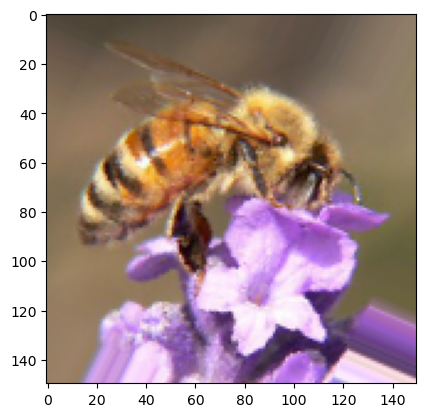

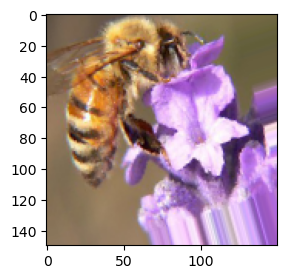

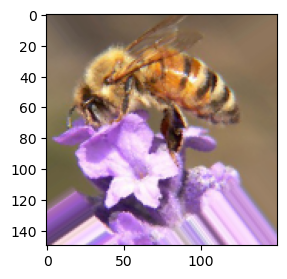

<Figure size 400x300 with 0 Axes>

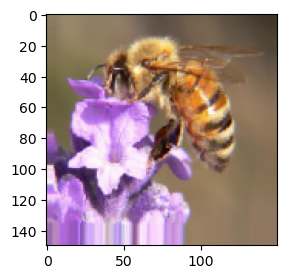

In [20]:
fnames = [os.path.join(train_dir+"/bee", fname) for
    fname in os.listdir(train_dir+"/bee")]

img_path = fnames[0]

img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)

x = x.reshape((1,) + x.shape)

i=0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(figsize=(4, 3))
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [21]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

In [22]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [23]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150), 
                                                    batch_size=32, 
                                                    class_mode='binary')

Found 3677 images belonging to 2 classes.


In [24]:
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(150, 150),
                                                  batch_size=32,
                                                  class_mode='binary')

Found 918 images belonging to 2 classes.


## Question 5

Let's train our model for 10 more epochs using the same code as previously.

*Note: make sure you don't re-create the model - we want to continue training the model we already started training.*

What is the mean of test loss for all the epochs for the model trained with augmentations?

- `0.18`
- <u>**`0.48`**</u>
- `0.78`
- `0.108`

In [25]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator)

Epoch 1/10
115/115 [==============================] - 25s 212ms/step - loss: 0.5053 - acc: 0.7612 - val_loss: 0.4891 - val_acc: 0.7778
Epoch 2/10
115/115 [==============================] - 24s 212ms/step - loss: 0.4916 - acc: 0.7680 - val_loss: 0.5173 - val_acc: 0.7669
Epoch 3/10
115/115 [==============================] - 24s 212ms/step - loss: 0.4792 - acc: 0.7794 - val_loss: 0.4577 - val_acc: 0.7887
Epoch 4/10
115/115 [==============================] - 24s 213ms/step - loss: 0.4842 - acc: 0.7729 - val_loss: 0.6039 - val_acc: 0.7070
Epoch 5/10
115/115 [==============================] - 24s 212ms/step - loss: 0.4813 - acc: 0.7789 - val_loss: 0.5310 - val_acc: 0.7527
Epoch 6/10
115/115 [==============================] - 24s 211ms/step - loss: 0.4771 - acc: 0.7745 - val_loss: 0.4997 - val_acc: 0.7636
Epoch 7/10
115/115 [==============================] - 24s 211ms/step - loss: 0.4766 - acc: 0.7862 - val_loss: 0.4548 - val_acc: 0.7919
Epoch 8/10
115/115 [==============================] - 2

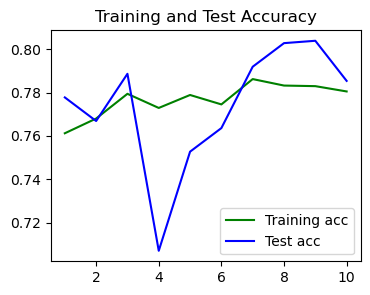

<Figure size 640x480 with 0 Axes>

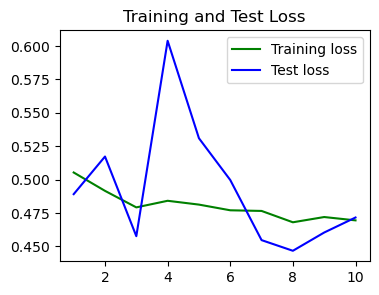

In [26]:
acc_aug = history.history['acc']
test_acc_aug = history.history['val_acc']
loss_aug = history.history['loss']
test_loss_aug = history.history['val_loss']

epochs_aug = range(1, len(acc) + 1)

plt.figure(figsize=(4, 3))
plt.plot(epochs_aug, acc_aug, 'g', label='Training acc')
plt.plot(epochs_aug, test_acc_aug, 'b', label='Test acc')
plt.title('Training and Test Accuracy')
plt.legend()

plt.figure()

plt.figure(figsize=(4, 3))
plt.plot(epochs_aug, loss_aug, 'g', label='Training loss')
plt.plot(epochs_aug, test_loss_aug, 'b', label='Test loss')
plt.title('Training and Test Loss')
plt.legend()

plt.show()

In [27]:
loss_mean_aug = np.mean(test_loss_aug)
loss_mean_aug

0.49323447942733767

- What is the mean of test loss for all the epochs for the model trained with augmentations?: **`0.48`**

## Question 6

What's the average of test accuracy for the last 5 epochs (from 6 to 10) for the model trained with augmentations?

- `0.38`
- `0.58`
- <u>**`0.78`**</u>
- `0.98`

In [28]:
test_acc_aug[5:10]

[0.7636165618896484,
 0.7919390201568604,
 0.8028322458267212,
 0.8039215803146362,
 0.7854030728340149]

In [29]:
acc_mean_aug = np.mean(test_acc_aug[5:10])
acc_mean_aug

0.7895424962043762

- What's the average of test accuracy for the last 5 epochs (from 6 to 10) for the model trained with augmentations?: **`0.78`**